In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
input_dim = X_train.shape[1] * X_train.shape[2]  # 28*28
output_dim = num_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [7]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## In this task, you'll implement several ANN models with different activation functions. Specifically, do the following:

## Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the tanh activation function for each layer.

In [8]:
# make build model function
def build_model(optimizer=SGD,model_name='Model',activation='relu',output_activation='softmax',metrics='accuracy',
                loss='categorical_crossentropy',batch_size=100,epochs=200,learning_rate=.01):
  # instantiate model
  model = Sequential()
  # first layer
  model.add(Dense(128, input_dim=X_train.shape[1] ,activation=activation))
  # second layer
  model.add(Dense(64 ,activation=activation))
  # fifth layer/output layer with output activation
  model.add(Dense(y_train.shape[1] ,activation=output_activation))

  # create optimizer
  optimized=optimizer(lr=learning_rate)
  # compile model
  model.compile(optimizer=optimized, loss=loss, metrics=[metrics])
  # fit model and save to history
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=0)
  
  return model, history

# make model results visualization function
def model_results(model,history,model_name='Model'):
  # dataframe with epoch history
  model_df = pd.DataFrame(history.history)
  # plot model loss over epochs
  model_df[['loss', 'val_loss']].plot(figsize=(20,10))
  plt.title(f'{model_name} Loss'.capitalize() )
  plt.show()
  # plot model accuracy over epochs
  model_df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
  plt.title(f'{model_name} Accuracy'.capitalize() )
  plt.show()  
  # final epoch model results
  results = model.evaluate(X_test, y_test, verbose=0)
  print(f'{model_name} Loss: '.capitalize() , round(results[0],6))
  print(f'{model_name} Accuracy: '.capitalize() , round(results[1],6))

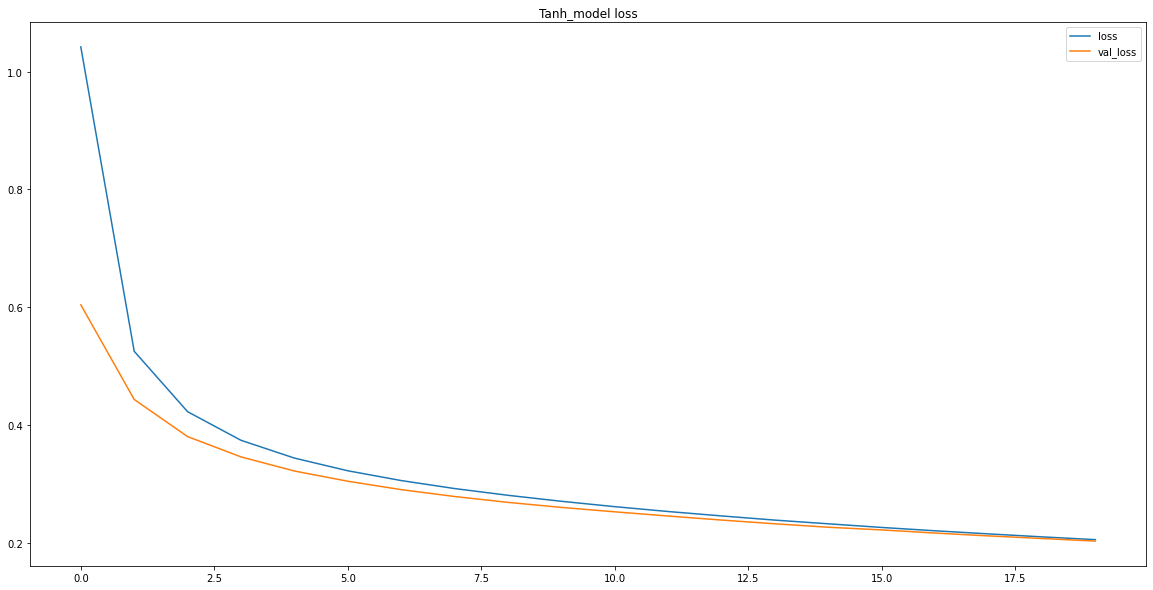

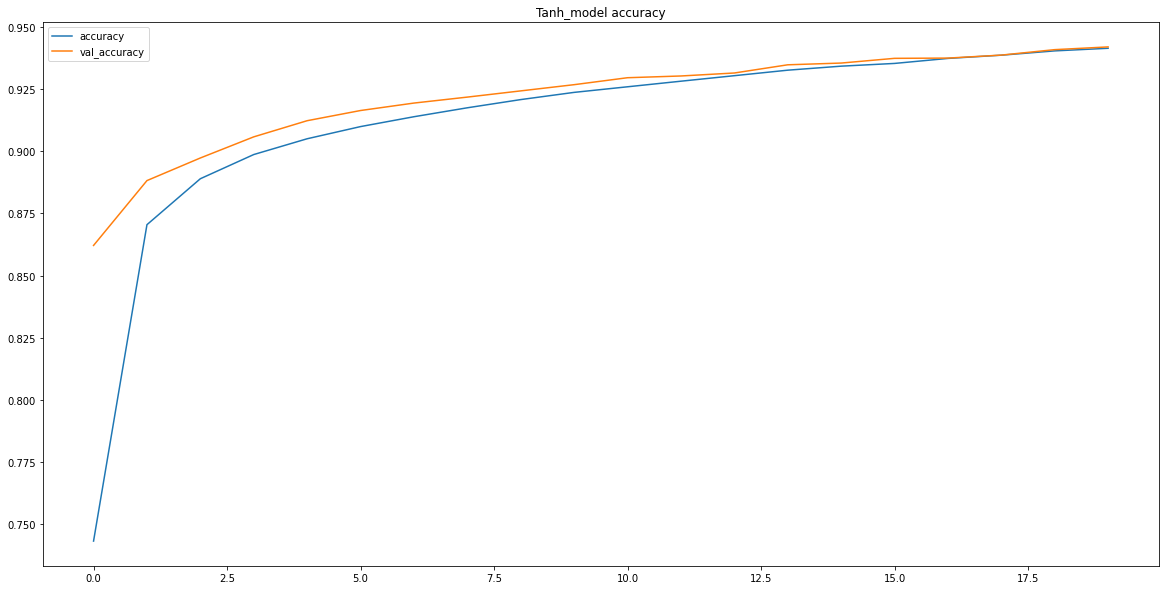

Tanh_model loss:  0.202742
Tanh_model accuracy:  0.942


In [9]:
# build tanh categorical entropy model
tanh_model, tanh_model_history = build_model(activation='tanh',batch_size=batch_size,epochs=nb_epoch)

# model results and visuals
tanh_model_results = model_results(tanh_model, tanh_model_history, model_name='TANH_Model')

## Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the sigmoid activation function for each layer.

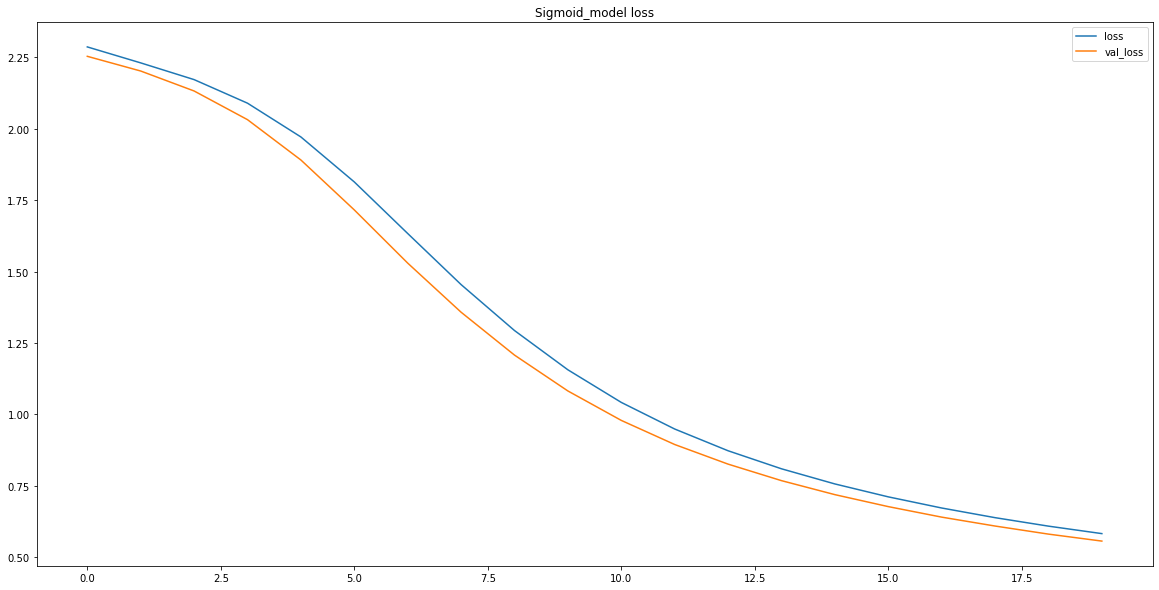

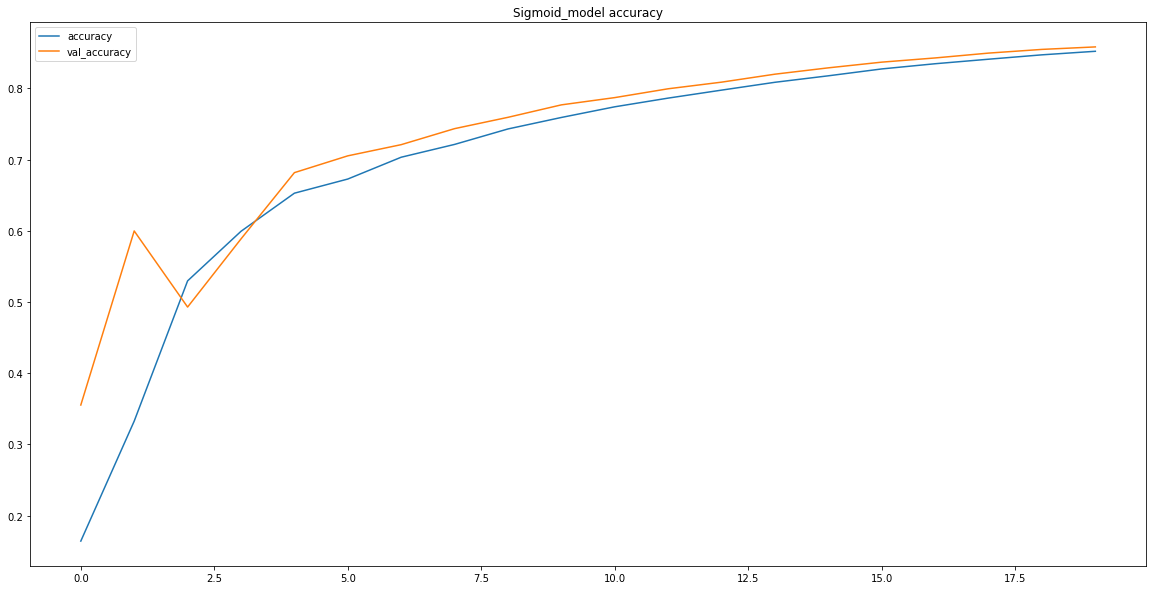

Sigmoid_model loss:  0.55661
Sigmoid_model accuracy:  0.8582


In [10]:
# build sigmoid categorical entropy model
sigmoid_model, sigmoid_model_history = build_model(activation='sigmoid',batch_size=batch_size,epochs=nb_epoch)

# model results and visuals
sigmoid_model_results = model_results(sigmoid_model, sigmoid_model_history, model_name='Sigmoid_Model')

## Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the ReLU activation function for each layer.

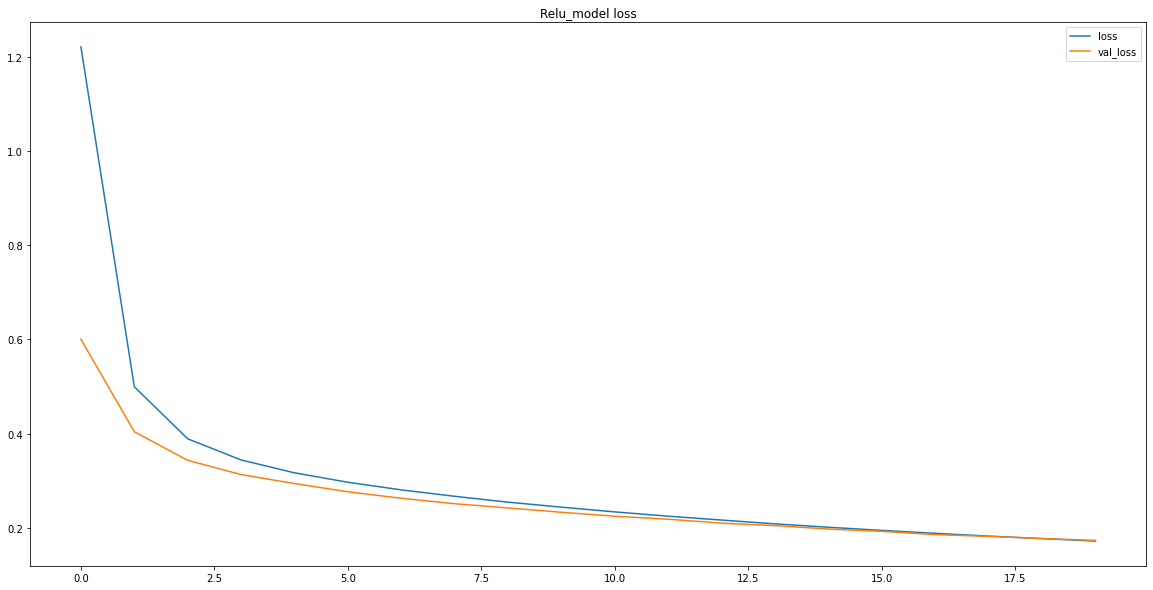

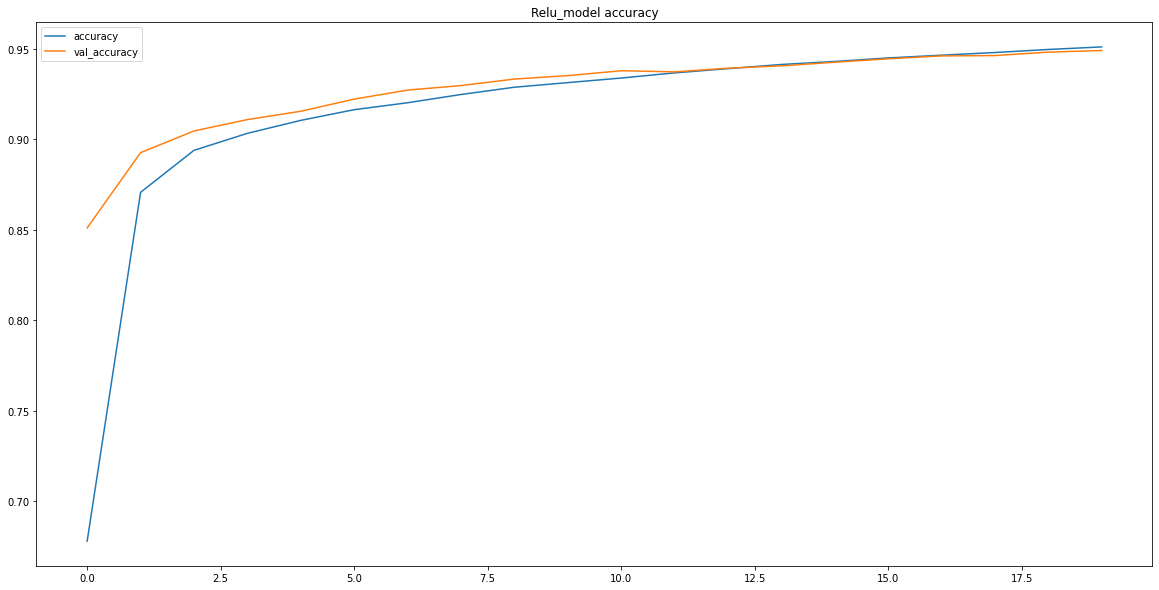

Relu_model loss:  0.173471
Relu_model accuracy:  0.9491


In [11]:
# build relu categorical entropy model
relu_model, relu_model_history = build_model(activation='relu',batch_size=batch_size,epochs=nb_epoch)

# model results and visuals
relu_model_results = model_results(relu_model, relu_model_history, model_name='RELU_Model')

## Compare the results of each model. Which activation function performed best?

The RELU model has the best test accuracy of the 3 models. Its slightly performed better than the TANH and it performed significantly better than the sigmoid model.

## In this task, you'll implement the ANN models specified below. For each, use the hinge loss function as the loss function.

## Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the tanh activation function for each layer.

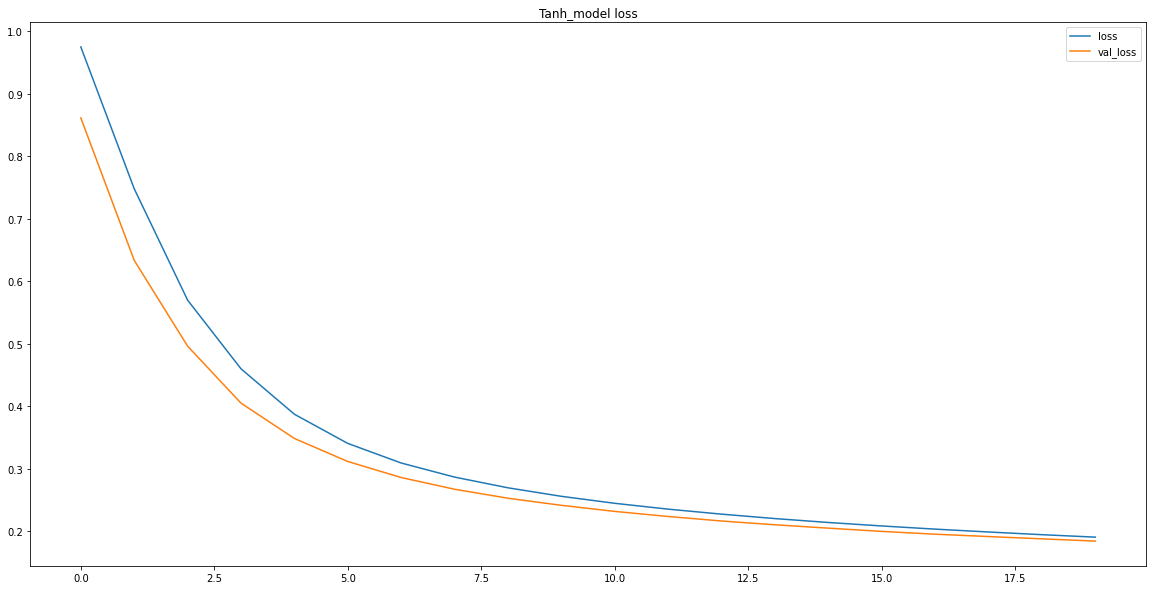

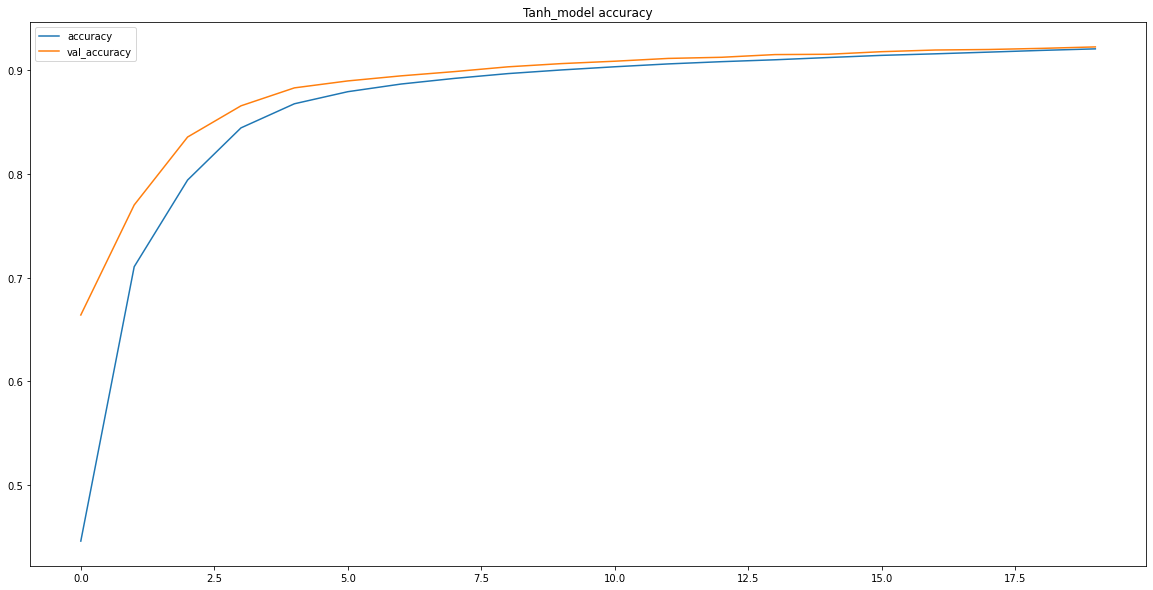

Tanh_model loss:  0.183862
Tanh_model accuracy:  0.9225


In [12]:
# build tanh hinge loss model
tanh_model, tanh_model_history = build_model(activation='tanh',batch_size=batch_size,epochs=nb_epoch,loss='categorical_hinge')

# model results and visuals
tanh_model_results = model_results(tanh_model, tanh_model_history, model_name='TANH_Model')

## Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the sigmoid activation function for each layer.

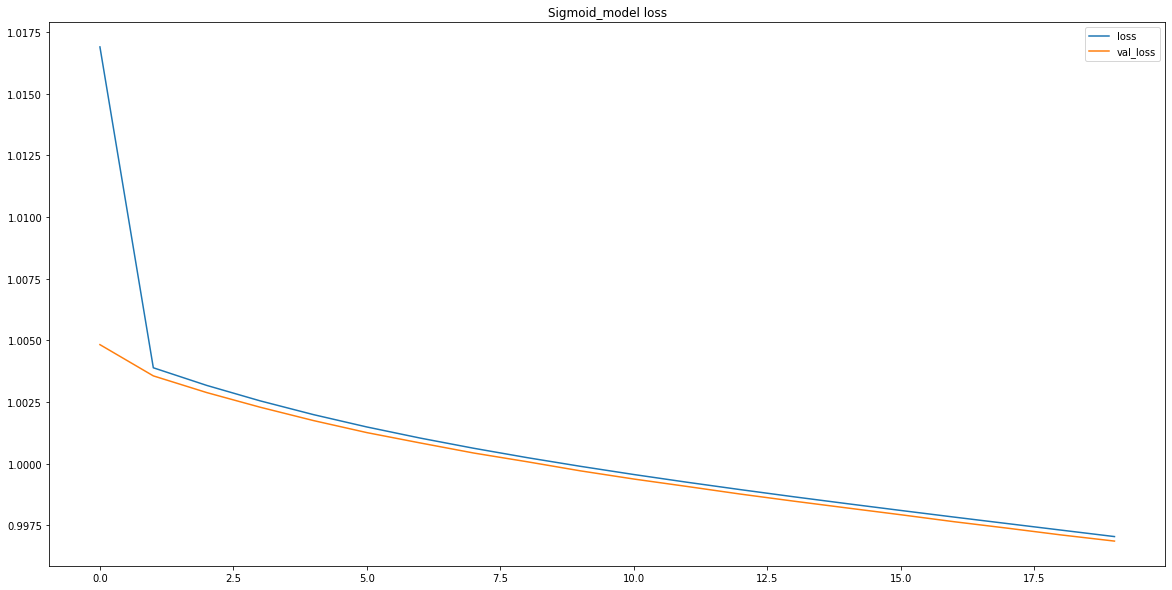

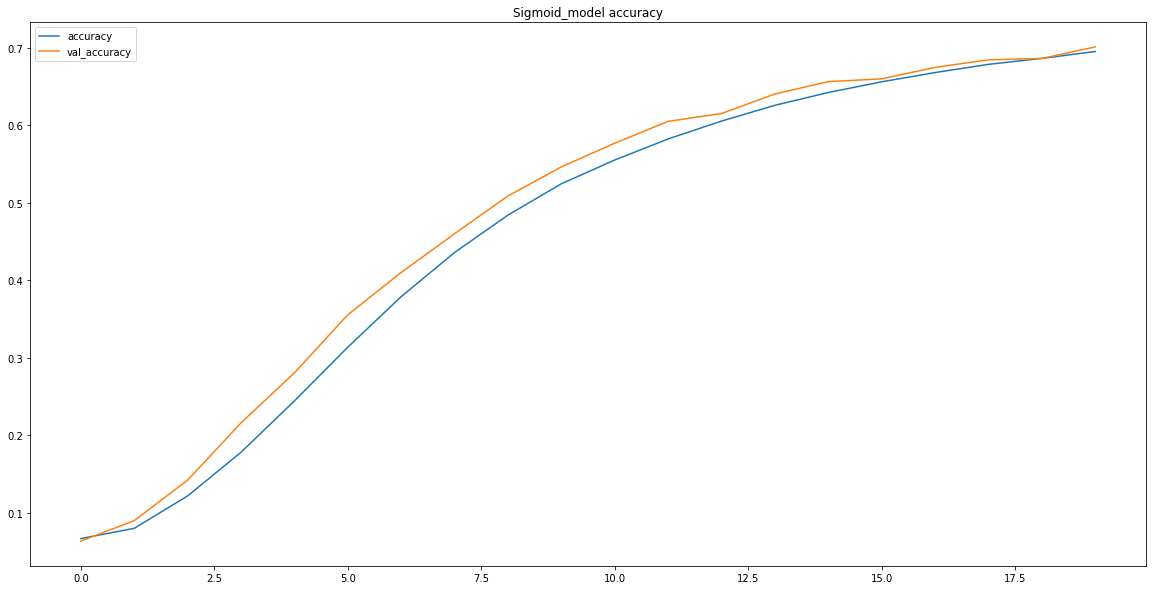

Sigmoid_model loss:  0.996862
Sigmoid_model accuracy:  0.701


In [13]:
# build signoid hinge loss model
sigmoid_model, sigmoid_model_history = build_model(activation='sigmoid',batch_size=batch_size,epochs=nb_epoch,loss='categorical_hinge')

# model results and visuals
sigmoid_model_results = model_results(sigmoid_model, sigmoid_model_history, model_name='Sigmoid_Model')

## Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the ReLU activation function for each layer.

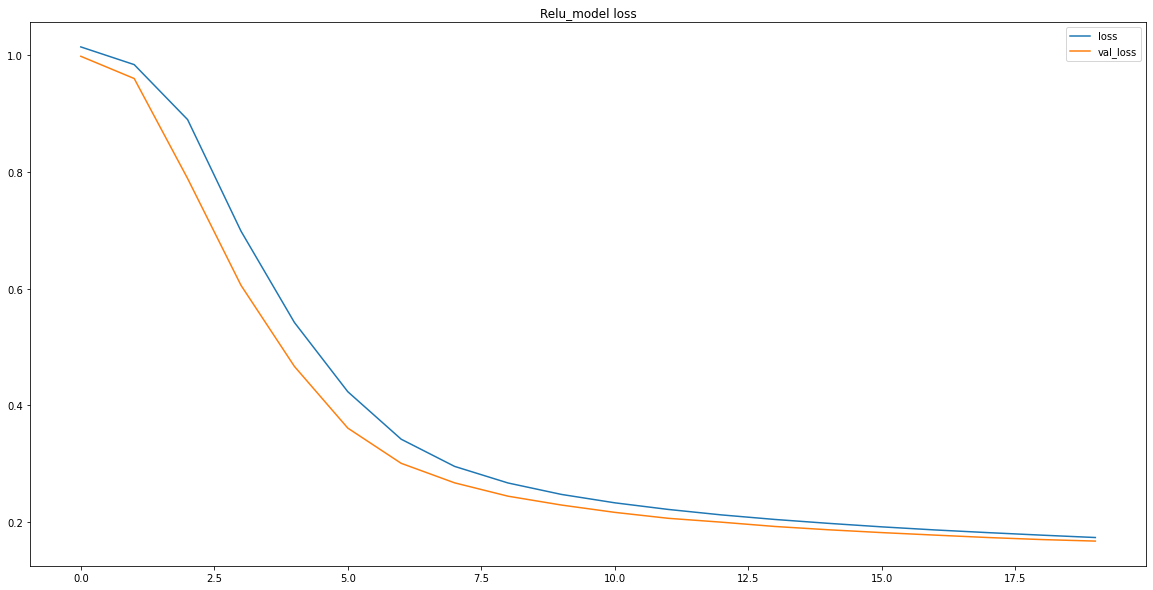

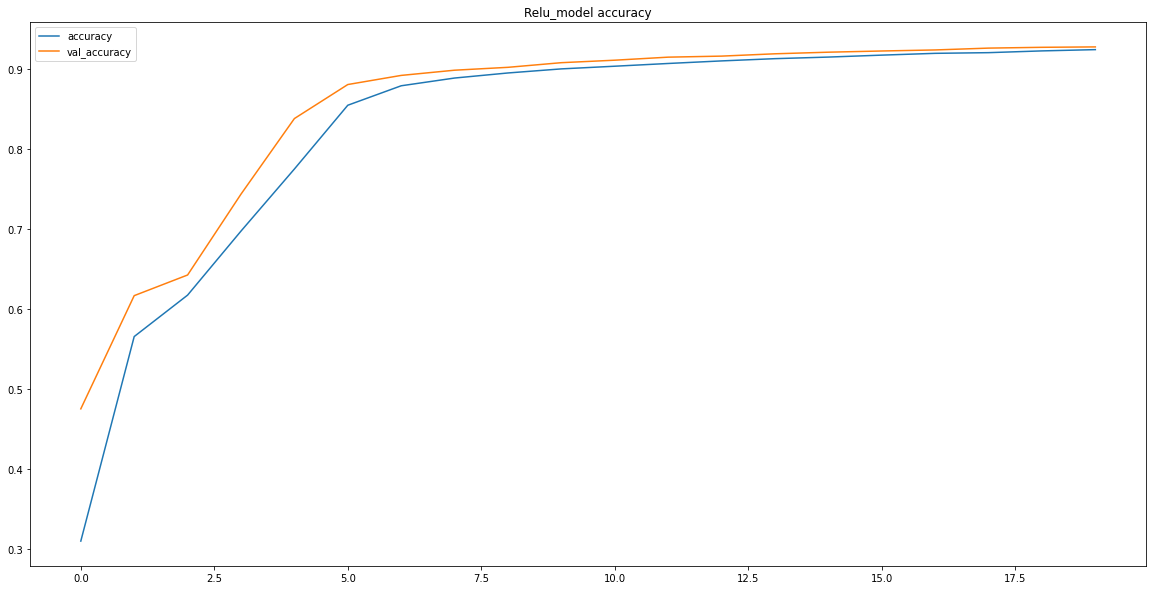

Relu_model loss:  0.16727
Relu_model accuracy:  0.9272


In [14]:
# build relu hinge loss model
relu_model, relu_model_history = build_model(activation='relu',batch_size=batch_size,epochs=nb_epoch,loss='categorical_hinge')

# model results and visuals
relu_model_results = model_results(relu_model, relu_model_history, model_name='RELU_Model')

## Compare the results of each model with the result of the same model from the previous task. Which loss function performed best?

We the same trend that we saw with the caterogical cross-entropy models. The RELU model has the best test accuracy of the 3 models. Its slightly performed better than the TANH and it performed significantly better than the sigmoid model.

Overall, the categorical cross-entropy loss function models had higher accuracy scores than compared to their counterparts with the hinge loss function. It appears that the categorical cross-entropy loss function produces more accurate models. 